In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

In [2]:
path = "data_entries/RE8_cloudnet_results.csv"

In [3]:
data = pd.read_csv(path)

In [5]:
drop_cols = [c for c in data.columns if ("MIN" in c) or ('MAX' in c) or ('Step' in c)]

In [6]:
data.drop(columns=drop_cols, inplace=True)

In [7]:
data['epoch'] = (data.index + 1)

---

In [9]:
columns = data.columns
columns = [c.split('/')[-1] for c in columns]

In [10]:
data.columns = columns

---

### plot

In [14]:
columns

['test_accuracy', 'test_loss', 'epoch']

In [12]:
sns.set_theme(style="whitegrid")
%config InlineBackend.figure_format = 'svg'

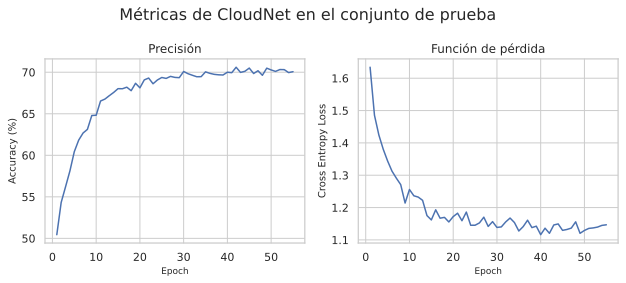

In [20]:
fig, axs = plt.subplots(1,2, dpi=1200)
fig.suptitle("Métricas de CloudNet en el conjunto de prueba", fontsize=16)
fig.set_figwidth(9)
fig.set_figheight(4)


### ACC
#axs[0].plot(data['epoch'], data['train_accuracy']*100, label='Entrenamiento')
axs[0].plot(data['epoch'], data['test_accuracy']*100, label='Prueba')
axs[0].title.set_text('Precisión')
axs[0].title.set_fontsize(12)
axs[0].set_xlabel('Epoch', fontsize=9)
axs[0].set_ylabel('Accuracy (%)', fontsize=10)
#axs[0].legend()


### LOSS
#axs[1].plot(data['epoch'], data['train_loss'], label='Entrenamiento')
axs[1].plot(data['epoch'], data['test_loss'], label='Prueba')
axs[1].title.set_text('Función de pérdida')
axs[1].title.set_fontsize(12)
axs[1].set_xlabel('Epoch', fontsize=9)
axs[1].set_ylabel('Cross Entropy Loss', fontsize=10)
#axs[1].legend()

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=0.8, 
                    top=0.7, 
                    wspace=0.4, 
                    hspace=0)

fig.tight_layout()

fig.savefig('assets/metricas_re4_1.png')
plt.show()